# Thinkful Capstone 1 

## The Data:

I will analyze a very rich dataset containing pitching, hitting, and fielding statistics as well as team and player information from the history of the major leagues of baseball in the USA from 1871 through the 2018 MLB season. It was created by Sean Lahman and can be found at seanlahman.com. He describes the dataset on his website as "the
largest and most accurate source for baseball statistics available
anywhere."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

players = pd.read_csv('C:\Python34\Capstone1\People.csv')

There are 27 data tables with incredibly detailed statistics for each player that has ever played. They are all linked together through a unique 'playerID' number.

In [2]:
#count elements in the dataframe
players.size

470808

In [3]:
#count number of players
players.playerID.size

19617

There are 470,808 elements in only one of the 27 tables, and there have been 19,617 major leaguers recorded in this dataset. Since it is incredibly large, I will narrow my focus to player demographics.

## Analytic Questions:

#### (1) Where are players from and how has that changed over time?

Let's start by seeing how many countries are represented:

In [4]:
##Find number of unique countries
len(list(players.birthCountry.unique()))

57

There are 57 countries represented throughout the history of baseball. Next, let's plot the top 20 countries by number of players:

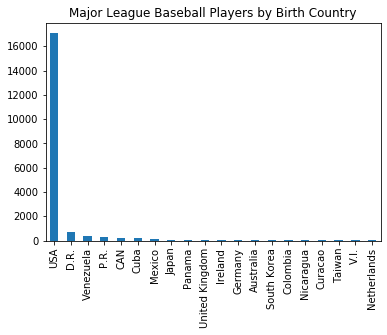

In [5]:
##bar graph of number of players from each country
players.birthCountry.value_counts().head(20).plot(kind='bar', title='Major League Baseball Players by Birth Country')

This shows an outlier that we should have already expected -- an overwhelming majority of players are from the USA. Two factors come to mind: baseball was a uniquely American game in a much less globalized world, and the country has a history of rampant racism. Jackie Robinson debuted as the first black player in 1946 and the Red Sox refused to sign a black player until 1959.

However, our data set does not indicate race, which can be subjective anyway, so we will focus on birth country as our demographic criteria and birth year to see trends over time. Since the USA is an overwhelming majority, I'll group all foreign born players into one category and see how the ratio between the amount of USA and international players has changed.

In [6]:
##check for null values
players.birthYear.isnull().sum()

120

In [7]:
players.birthCountry.isnull().sum()

64

There 120 missing values for birth year and 64 for birth country out of over 19,000 players. We can safely drop them from our population and still have a very nice sample. 

In [8]:
##drop null values 
players.birthYear.dropna(inplace=True)
players.birthCountry.dropna(inplace=True)
##create boolean column based on from USA or not
players['countryBoolean'] = players.birthCountry == 'USA'

Now we'll group our data by decade and whether they are USA or internationally born.

In [9]:
##create birth decade column
players['decade'] = players['birthYear'].apply(lambda x: np.floor(x/10)*10)
demographics = players.groupby(by=["decade", "countryBoolean"]).size().reset_index()
demographics.head(10)

,decade,countryBoolean,0
0,1820.0,False,1
1,1820.0,True,1
2,1830.0,False,1
3,1830.0,True,9
4,1840.0,False,18
5,1840.0,True,133
6,1850.0,False,59
7,1850.0,True,536
8,1860.0,False,57
9,1860.0,True,906


With only 12 players born before 1840, we can drop them to improve our sample.

In [10]:
#create new df without 1820s or 1830s
final_demographics = demographics.drop([0,1,2,3]).reset_index()

Next I'll add a column for total players by decade in order to calculate the ratio of USA players.

In [11]:
##create df to count total players per decade
total_decade = players.groupby(by=["decade"]).size().reset_index().drop([0,1])
total_decade.reset_index(inplace=True)
total_decade.drop(['index'], axis=1, inplace=True)
##create df to join total players
final = pd.merge(final_demographics, total_decade, on='decade', how="inner", suffixes=["1", "2"])
##create column for ratio of USA players
final["ratio"] = (final["01"]/final["02"])*100
##create df for only USA ratios by decade
usa_ratios = final[final.countryBoolean==True]
usa_ratios

,index,decade,countryBoolean,01,02,ratio
1,5,1840.0,True,133,152,87.500000
3,7,1850.0,True,536,596,89.932886
5,9,1860.0,True,906,964,93.983402
7,11,1870.0,True,851,897,94.871795
9,13,1880.0,True,1247,1294,96.367852
11,15,1890.0,True,1458,1493,97.655727
13,17,1900.0,True,1068,1087,98.252070
15,19,1910.0,True,1198,1245,96.224900
17,21,1920.0,True,966,1022,94.520548
19,23,1930.0,True,883,989,89.282103


There's our final table. A line graph can help better visualize the trend over time.

(40, 105)

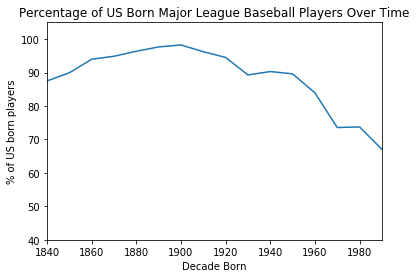

In [12]:
##create line graph
demo_line = usa_ratios.plot.line(x='decade', y='ratio', title='Percentage of US Born Major League Baseball Players Over Time', legend=False)
plt.xlabel('Decade Born')
plt.ylabel('% of US born players')
plt.ylim([40, 105])

We can conclude that the ratio has obviously decreased over time as baseball gained popularity and the world became more globalized. More interstingly, 13% of initial players were foreign and that percentage dimished to less than 3% around the turn of the 19th century. Those 13% must have immigrated to the USA for reasons not related to baseball, as the game didn't exist where they came from yet. Conversely, the foreign born player influx in more recent decades is surely a player who grew up playing baseball in their home country and came specifically to play in the majors.

Next up, we'll take a look at the physical aspects of these players.

#### (2) How have physical attributes of players changed over time?

We'll be using height and weight data for our players. I expect to see significant increases in both categories over time as athletes have been getting bigger and stronger throughout all sports. However, it will be interesting to see if the steroids-ridden 2000s era of baseball will be detectable in our dataset as a sharp uptick. As a reminder, we are using birth year as our time criteria, so this data will correspond to roughly 20 to 25 years in the future.

Let's start with some summary statistics.

In [13]:
##find mean of all players weight in pounds
np.mean(players.weight)

186.8464772243508

In [14]:
##find mean of all players height in inches
np.mean(players.height)

72.30802649006623

The average professional throughout baseball history has been about 187 pounds and just over 6 feet tall. Let's go back to grouping by decade to see how it has changed.

In [15]:
##create new dataframe for physical stats and group by decade and calculate the mean for height and weight
physical = players[['height', 'weight', 'decade']].groupby('decade').mean().reset_index()
physical.head(5)

,decade,height,weight
0,1820.0,NaN,NaN
1,1830.0,68.250000,151.500000
2,1840.0,68.537037,157.190476
3,1850.0,69.175904,167.587678
4,1860.0,69.688830,169.142857


Let's drop the row with no values.

In [16]:
##drop 1820 decade
physical.drop(index=0).head(2)

,decade,height,weight
1,1830.0,68.250000,151.500000
2,1840.0,68.537037,157.190476


Now we can plot our data. The Y axis for height shows 5' as the lower limit and 7' as the upper.

Text(0.5, 1.0, 'Avg. Height for Baseball Major Leaguers by Decade')

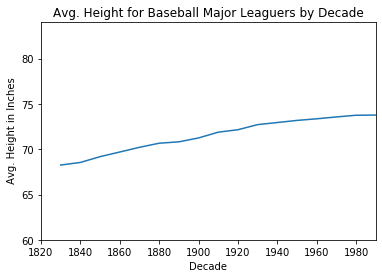

In [17]:
##plot avg height by decade
physical.plot(x='decade', y='height', legend=False, ylim=[60, 84])
plt.ylabel(' Avg. Height in Inches')
plt.xlabel('Decade')
plt.title('Avg. Height for Baseball Major Leaguers by Decade')

As we can see here, height has risen over time, but nothing substantial. It has grown from just below 6 ft. to a few inches over. Obviously height is not something someone can train to improve, but as the pool of potential players has grown, the taller have been more likely to succeed.

Text(0.5, 1.0, 'Avg. Weight for Baseball Major Leaguers by Decade')

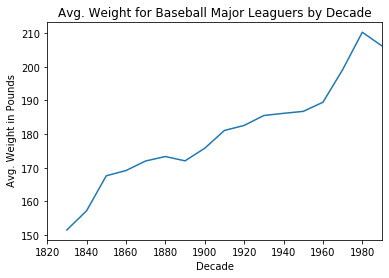

In [18]:
##plot avg weight by decade
physical.plot(x='decade', y='weight', legend=False)
plt.ylabel(' Avg. Weight in Pounds')
plt.xlabel('Decade')
plt.title('Avg. Weight for Baseball Major Leaguers by Decade')

And there it is, an obvious growth of players over time as expected. We can also see the sharp uptick in players born in the 1980s who would go on to play in the 2000s in which there was well documented rampant steroid abuse. 

#### (3) Are there any correlated trends to the steroid era?

Finally, we'll take a closer look at the spike in player weight from players born in the 80s. Since I argue this is due to steroid abuse, what other stats can we observe that correlate to that? First things that come to mind are home runs of course. 

Text(0.5, 1.0, 'Total HR by Year')

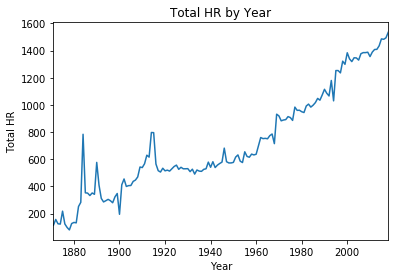

In [20]:
##get batting stats csv
initial_batting = pd.read_csv('C:\Python34\Capstone1\Batting.csv')
##create df with year and HR
batting = initial_batting[['yearID', 'HR']].copy().groupby(['yearID']).size()
batting.plot()
plt.ylabel('Total HR')
plt.xlabel('Year')
plt.title('Total HR by Year')

Here we see that home run totals follow the same broad trend as player weight -- both have consistently increased over time. However, there doesn't seem to be an obvious spike upwards in the 2000s that corresponds with the peak and decline shown in our player weight graph. One reason comes to mind: opposing pitchers were using steroids as well, so that player weight would be more indicative of overall steroid use than any baseball statistic would be.

Another reason could be that a minority of players who were on steroids were the ones putting up massive home run numbers and created the identity of that era of baseball, while the majority of players only slightly increased their size and performance. Let's look at the top performances by year.

Text(0.5, 1.0, 'League Best HR total by Year')

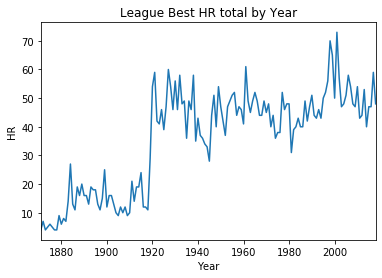

In [26]:
##create new df grouped by highest player hr per year
top_batting = initial_batting[['yearID', 'HR']].copy().groupby(['yearID']).max()
top_batting.plot(legend=False)
plt.ylabel('HR')
plt.xlabel('Year')
plt.title('League Best HR total by Year')

We finally see our expected trend again. The tallest peak is Barry Bonds' all time single season record total of 73 HR in the 2001 season. The sharp spike in 1920 can be credited to the emergence of Babe Ruth. Here's the 5 highest single season totals:

In [30]:
##create df of top 5 HR seasons
hr_array = np.array([['Barry Bonds', 73, 2001],
                     ['Mark McGwire', 70, 1998],
                     ['Sammy Sosa', 66, 1998],
                     ['Mark McGwire', 65, 1999],
                     ['Sammy Sosa', 64, 2001]])
homerun = pd.DataFrame(hr_array)
homerun.columns = ['Name', 'HR', 'Season']
homerun

,Name,HR,Season
0,Barry Bonds,73,2001
1,Mark McGwire,70,1998
2,Sammy Sosa,66,1998
3,Mark McGwire,65,1999
4,Sammy Sosa,64,2001


Clearly these 3 players are the face of steroids in the MLB and for good reason. Barry Bonds weighed 185 pounds in 1991 and grew to be 228 pounds in his record-setting 2001 season. It seems that this era of baseball was most likely very top-heavy in its steroid abuse. Only a handful of players used them to the extreme that McGwire, Sosa, and Bonds did.

## Further Reasearch

Moving forward in this course, I want to be able to create prediction models for datasets like this one. Based on such rich data, we could attempt to predict win totals for teams, potential World Series winners, etc. 